In [6]:
%matplotlib inline  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
train = pd.read_csv('H:/GIM Strategy and Execution/Knowledge/Data and Python/titanic/train.csv')

In [3]:
del(train['Ticket'])

del(train['PassengerId'])

In [4]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


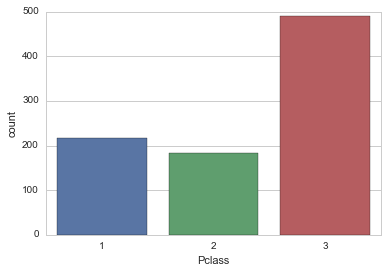

In [8]:
sns.countplot( x= 'Pclass', data = train)

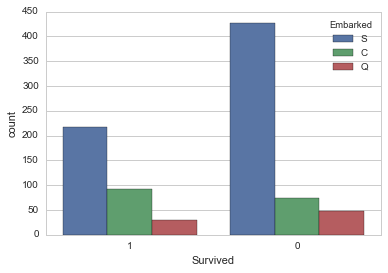

In [9]:
sns.countplot(x = 'Survived', hue = 'Embarked', data = train, order = [1,0])

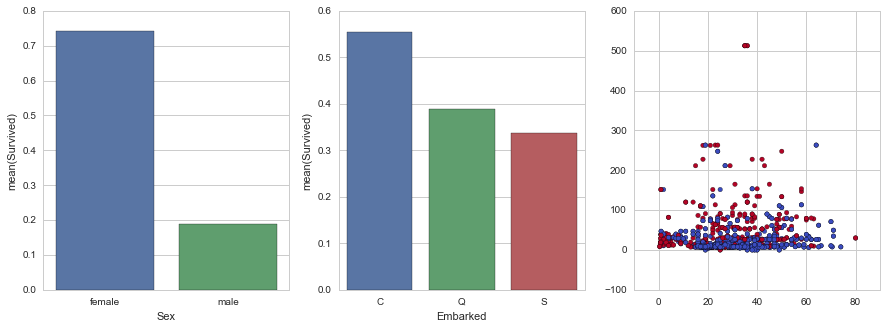

In [10]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

#Plot to see % of people from each embarkment survived
embarkedmean = train[['Survived', 'Embarked']].groupby(['Embarked'], as_index = False).mean()
sns.barplot(x = 'Embarked', y = 'Survived', data = embarkedmean, ax = axis2)

#Plot to see % of male / female survived
sexmean = train[['Survived', 'Sex']].groupby(['Sex'], as_index = False).mean()
sns.barplot('Sex', 'Survived', data = sexmean, ax = axis1)

#plot scatter of age vs fare w/ survival as colors
plt.scatter(train['Age'], train['Fare'], c= train['Survived'], cmap=plt.cm.coolwarm)

tMale = train.loc[train['Sex']=='male']
plt.scatter(tMale['Age'], tMale['Fare'], c= tMale['Survived'], cmap=plt.cm.coolwarm)

In [11]:
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [12]:
train.summary()

AttributeError: 'DataFrame' object has no attribute 'summary'

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [23]:
meanSibsp = train[['SibSp', 'Survived']].groupby(['SibSp']).mean()
meanSibsp.columns=['Mean']
countSibSp= train[['SibSp', 'Survived']].groupby(['SibSp']).count()
countSibSp.columns=['Count']
pd.concat([meanSibsp, countSibSp], axis = 1)

,Mean,Count
SibSp,,
0,0.345395,608
1,0.535885,209
2,0.464286,28
3,0.250000,16
4,0.166667,18
5,0.000000,5
8,0.000000,7
